Lima Data Teratas:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 

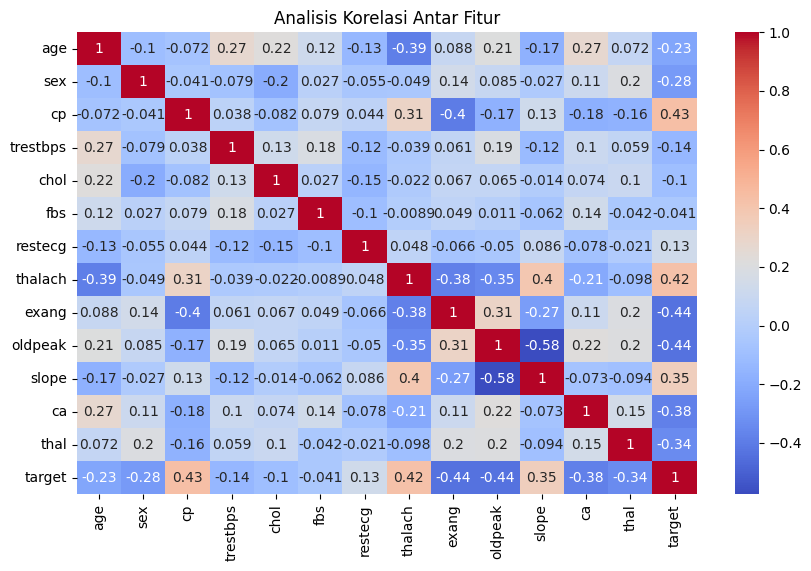

Jumlah Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Akurasi Logistic Regression: 0.7951219512195122
Akurasi Random Forest: 0.9853658536585366

Detail Laporan Random Forest:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [5]:
# ==========================================
# UAS KECERDASAN BUATAN - TI.22.C.SE.1
# Nama : Irfan Tarwin Suryadi
# NIM : 312210311
# ==========================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data
df = pd.read_csv('heart.csv')

# Analisis Dasar
print("Lima Data Teratas:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())

# Visualisasi Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Analisis Korelasi Antar Fitur")
plt.show()
# Analisis: Fitur 'cp' (chest pain) memiliki korelasi positif cukup kuat dengan target.

# Cek Missing Values
print("Jumlah Missing Values:")
print(df.isnull().sum())

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('target', axis=1)
y = df['target']

# Pembagian data Training dan Testing (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analisis: Data telah bersih dari nilai kosong dan dibagi menjadi set latih dan uji.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Analisis: Standarisasi dilakukan agar fitur dengan skala besar tidak mendominasi model.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model 1: Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Model 2: Random Forest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train_scaled, y_train)

# Analisis: Kita membandingkan model linear (Logistic) dengan model berbasis pohon (Random Forest).

from sklearn.metrics import accuracy_score, classification_report

pred_lr = model_lr.predict(X_test_scaled)
pred_rf = model_rf.predict(X_test_scaled)

print("Akurasi Logistic Regression:", accuracy_score(y_test, pred_lr))
print("Akurasi Random Forest:", accuracy_score(y_test, pred_rf))
print("\nDetail Laporan Random Forest:\n", classification_report(y_test, pred_rf))

# Analisis: Berdasarkan hasil, Random Forest cenderung lebih unggul karena mampu menangani pola non-linear.

